# Proyecto Final - Data Science II: Machine Learning para la Ciencia de Datos
- **Alumno**: Matias Schinner
- **Comisión**: 61695

## Desarrollo del proyecto:
Este proyecto tiene como objetivo analizar y predecir la resistencia a la compresión del concreto en función de su composición de fabricación y la edad del mismo. Para ello, se emplearán técnicas de análisis de datos, visualización y algoritmos de regresión de machine learning.

El análisis se centrará en:
- Explorar la variabilidad entre los diferentes componentes del concreto y su influencia en la resistencia a la compresión.
- Identificar qué materiales y proporciones tienen mayor impacto en la resistencia final.
- Desarrollar modelos de machine learning para predecir la resistencia del concreto en función de su composición y edad.

Este proyecto servirá como práctica en la aplicación de modelos de regresión, utilizando bibliotecas como `pandas`, `numpy`, `scikit-learn`, `matplotlib` y `seaborn`. Al final, se espera obtener un modelo capaz de estimar con precisión la resistencia a la compresión del concreto a partir de sus ingredientes, además de extraer insights sobre cuáles factores son más determinantes en su desempeño estructural.

----------

## Dataset elegido:
El conjunto de datos proviene de un archivo que contiene información sobre diferentes mezclas de concreto y su resistencia a la compresión medida en megapascales (MPa). Cada fila representa una muestra de concreto con valores específicos de sus componentes/ingredientes y el número de días de estadio antes de la medición de la resistencia.

### Columnas del dataset:
*Vale aclarar que los ingredientes del concreto estan medidos en Kg del ingrediente por metro cubico de concreto final*
- **Cement [kg/m³]**: Cantidad de cemento en la mezcla, principal aglutinante.
- **Blast Furnace Slag [kg/m³]**: Escoria de alto horno, un material cementante suplementario que puede mejorar la durabilidad.
- **Fly Ash [kg/m³]**: Ceniza volátiles, otro material complementario que puede reducir costos y mejorar ciertas propiedades.
- **Water [kg/m³]**: Cantidad de agua utilizada; su relación con el cemento es crucial para la resistencia.
- **Superplasticizer [kg/m³]**: Aditivos Superplastificantes que mejoran la trabajabilidad y permiten reducir la cantidad de agua sin perder fluidez.
- **Coarse Aggregate [kg/m³]**: Agregado grueso (grava), que aporta estabilidad y resistencia mecánica.
- **Fine Aggregate [kg/m³]**: Agregado fino (arena), que rellena los espacios y mejora la cohesión de la mezcla.
- **Age [day]**: Número de días transcurridos desde la fabricación de la muestra hasta la medición de la resistencia.
- **Concrete compressive strength [MPa]**: Representa la resistencia a la compresión del concreto en megapascales.

[Fuente: Dataset - Concrete Compressive Strength](https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength)

----------
## Hipótesis planteadas:
1. Un mayor contenido de cemento estará asociado con una mayor resistencia del concreto.
2. Una mayor cantidad de agua reducirá la resistencia a la compresión debido a una mayor porosidad.
3. La edad del concreto seguirá una relación no lineal con la resistencia, mostrando mayor crecimiento en los primeros días y estabilizándose después de 28 días.
4. El uso de superplastificantes permitirá aumentar la resistencia al reducir la relación agua/cemento.

----------
### Se importan las librerías con las que se trabajarán a lo largo del proyecto:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


----------
### Lectura del dataset
Se carga el dataset a partir de un archivo "*.csv*"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/My Drive/Coderhouse/Carrera Data Science/DS II/Concrete strength prediction.csv"
df = pd.read_csv(file_path)

Mounted at /content/drive


Control de carga de datos correcta:

In [ ]:
df.head(5)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
#Se renombran las columnas con el objetivo de tener una mejor identificación de cada una
df.columns = [
    "Cement [Kg/m³]",
    "Blast Furnace Slag [Kg/m³]",
    "Fly Ash [Kg/m³]",
    "Water [Kg/m³]",
    "Superplasticizer [Kg/m³]",
    "Coarse Aggregate [Kg/m³]",
    "Fine Aggregate [Kg/m³]",
    "Age [days]",
    "Concrete Compressive Strength [MPa]"
]

df.head()

,Cement [Kg/m³],Blast Furnace Slag [Kg/m³],Fly Ash [Kg/m³],Water [Kg/m³],Superplasticizer [Kg/m³],Coarse Aggregate [Kg/m³],Fine Aggregate [Kg/m³],Age [days],Concrete Compressive Strength [MPa]
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
#Chequeo de los ultimos 5 datos:
df.tail()

,Cement [Kg/m³],Blast Furnace Slag [Kg/m³],Fly Ash [Kg/m³],Water [Kg/m³],Superplasticizer [Kg/m³],Coarse Aggregate [Kg/m³],Fine Aggregate [Kg/m³],Age [days],Concrete Compressive Strength [MPa]
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


------------------------------
## Análisis exploratorio de datos:
Este análisis sirve para comprender la estructura y las características fundamentales de un conjunto de datos a partir de un conjunto de técnicas que se basan en métodos estadísticos y visuales. Estas técnicas incluyen el uso de medidas descriptivas como la media, mediana y desviación estándar, así como la creación de gráficos y diagramas para visualizar patrones y relaciones. Además, el análisis exploratorio permite detectar anomalías y valores atípicos.

----------
### Chequeo del tipo de datos:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Cement [Kg/m³]                       1030 non-null   float64
 1   Blast Furnace Slag [Kg/m³]           1030 non-null   float64
 2   Fly Ash [Kg/m³]                      1030 non-null   float64
 3   Water [Kg/m³]                        1030 non-null   float64
 4   Superplasticizer [Kg/m³]             1030 non-null   float64
 5   Coarse Aggregate [Kg/m³]             1030 non-null   float64
 6   Fine Aggregate [Kg/m³]               1030 non-null   float64
 7   Age [days]                           1030 non-null   int64  
 8   Concrete Compressive Strength [MPa]  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


-------------
Este resumen nos brinda información sobre:
- **El tipo de datos**: Tenemos **valores numéricos flotantes** para casi todas las columnas excepto por la columna `Age` que tiene **valores numéricos enteros**
- **Cantidad de columnas y registros**: Podemos ver que posee 9 columnas numeradas del 0 al 8 y una cantidad de índices (registros) de 1030 numerados del 0 al 1029.
- **Conteo de valores no nulos**: El conteo de valores no nulos para todas las columnas es de 1030, es decir, que todos los registros en el dataset contienen valores.
- --------------------------------------------------------------

### Cantidad de registros:

In [ ]:
#Este codigo nos devuelve una tupla que contiene: (Cantidad de filas/registros/indices, cantidad de columnas)
df.shape

(1030, 9)

(Filas, Columnas)

--------------
### Control de datos faltantes:

In [ ]:
df.isnull().sum()

,0
Cement [Kg/m³],0
Blast Furnace Slag [Kg/m³],0
Fly Ash [Kg/m³],0
Water [Kg/m³],0
Superplasticizer [Kg/m³],0
Coarse Aggregate [Kg/m³],0
Fine Aggregate [Kg/m³],0
Age [days],0
Concrete Compressive Strength [MPa],0


-----------------------------------
Esta tabla nos muestra la cantidad de datos faltantes y valores vacíos, indicando que todas las columnas contienen 0 registros nulos o incompletos. Esto significa que **no** es necesario realizar tareas de reemplazo o eliminación de datos faltantes en este caso.

Sin embargo, a modo informativo, se detallan las posibles estrategias que podrían aplicarse en caso de que existieran valores nulos:

- _**Eliminar filas o columnas**_: Se pueden eliminar los registros o las columnas que contengan valores nulos, siempre y cuando no afecte negativamente al análisis. `dataframe.dropna(axis=0, inplace=True)` (axis= 1 para columnas, axis= 0 para registros)
- _**Rellenar con valores específicos**_: Reemplazar los valores faltantes por un número fijo, como un 0, o por un promedio, mediana u otro valor estadístico relevante. `dataframe.fillna(promedio, inplace=True)`
- _**Interpolación o métodos avanzados**_: Usar técnicas de interpolación entre los valores proximos a los faltantes. `dataframe.interpolate(limit_direction="both",inplace=True)`
------------------------------------

### Estadística descriptivas:

In [ ]:
df.describe()

,Cement [Kg/m³],Blast Furnace Slag [Kg/m³],Fly Ash [Kg/m³],Water [Kg/m³],Superplasticizer [Kg/m³],Coarse Aggregate [Kg/m³],Fine Aggregate [Kg/m³],Age [days],Concrete Compressive Strength [MPa]
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


En esta tabla se puede ver: la cantidad, la media, desviación estándar, el mínimo y máximo, cuartiles del 25%, 50% y 75% de cada columna.
Esto nos otorga una visión sobre los valores, el rango de los mismos, dispersión y media de los datos que estamos trabajando.

-----

### <u>Análisis Univariado</u>:
Este análisis nos ayudará a entender la distribución de cada variable y detectar valores extremos.

### Control de distribución de datos y detección de outliers:

*   **Boxplots:**

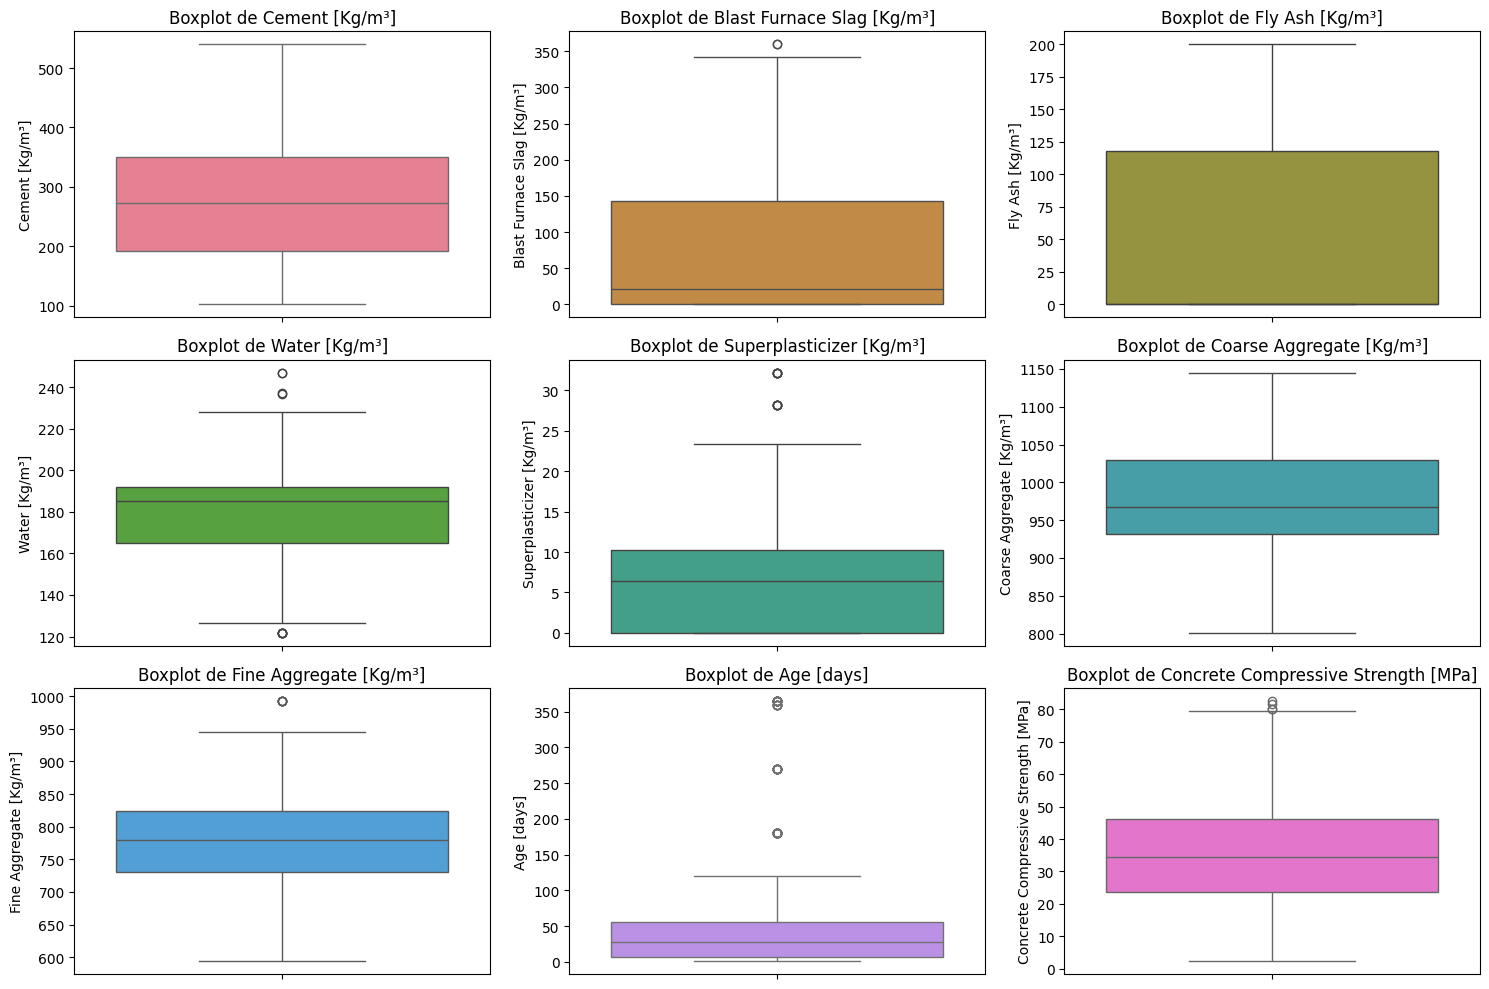

In [ ]:
colors = sns.color_palette("husl", n_colors=9)

variables = [
    "Cement [Kg/m³]", "Blast Furnace Slag [Kg/m³]", "Fly Ash [Kg/m³]",
    "Water [Kg/m³]", "Superplasticizer [Kg/m³]", "Coarse Aggregate [Kg/m³]",
    "Fine Aggregate [Kg/m³]", "Age [days]", "Concrete Compressive Strength [MPa]"
]

plt.figure(figsize=(15, 10))

for i, var in enumerate(variables):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df[var], color=colors[i])
    plt.title(f"Boxplot de {var}")

plt.tight_layout()
plt.show()

Podemos ver que se encuentren ciertos puntos fuera del boxplot en las variables Blast Furnace Slag, Water, Superplasticizer, Fine Aggregate, Age y Concrete compressive Strength. Sin embargo, se optará por conservar estos valores debido a las siguientes razones:
- Si bien son datos fuera de lo que se considera +-1,5 * Rango intercuartilico, no son considerados atípicos para el valor que representan.
- La cantidad de datos (1030) es baja y está fuertemente relacionada con la certeza del modelo predictivo, por lo que se opta por no eliminar valores.

*   **Histograma:**

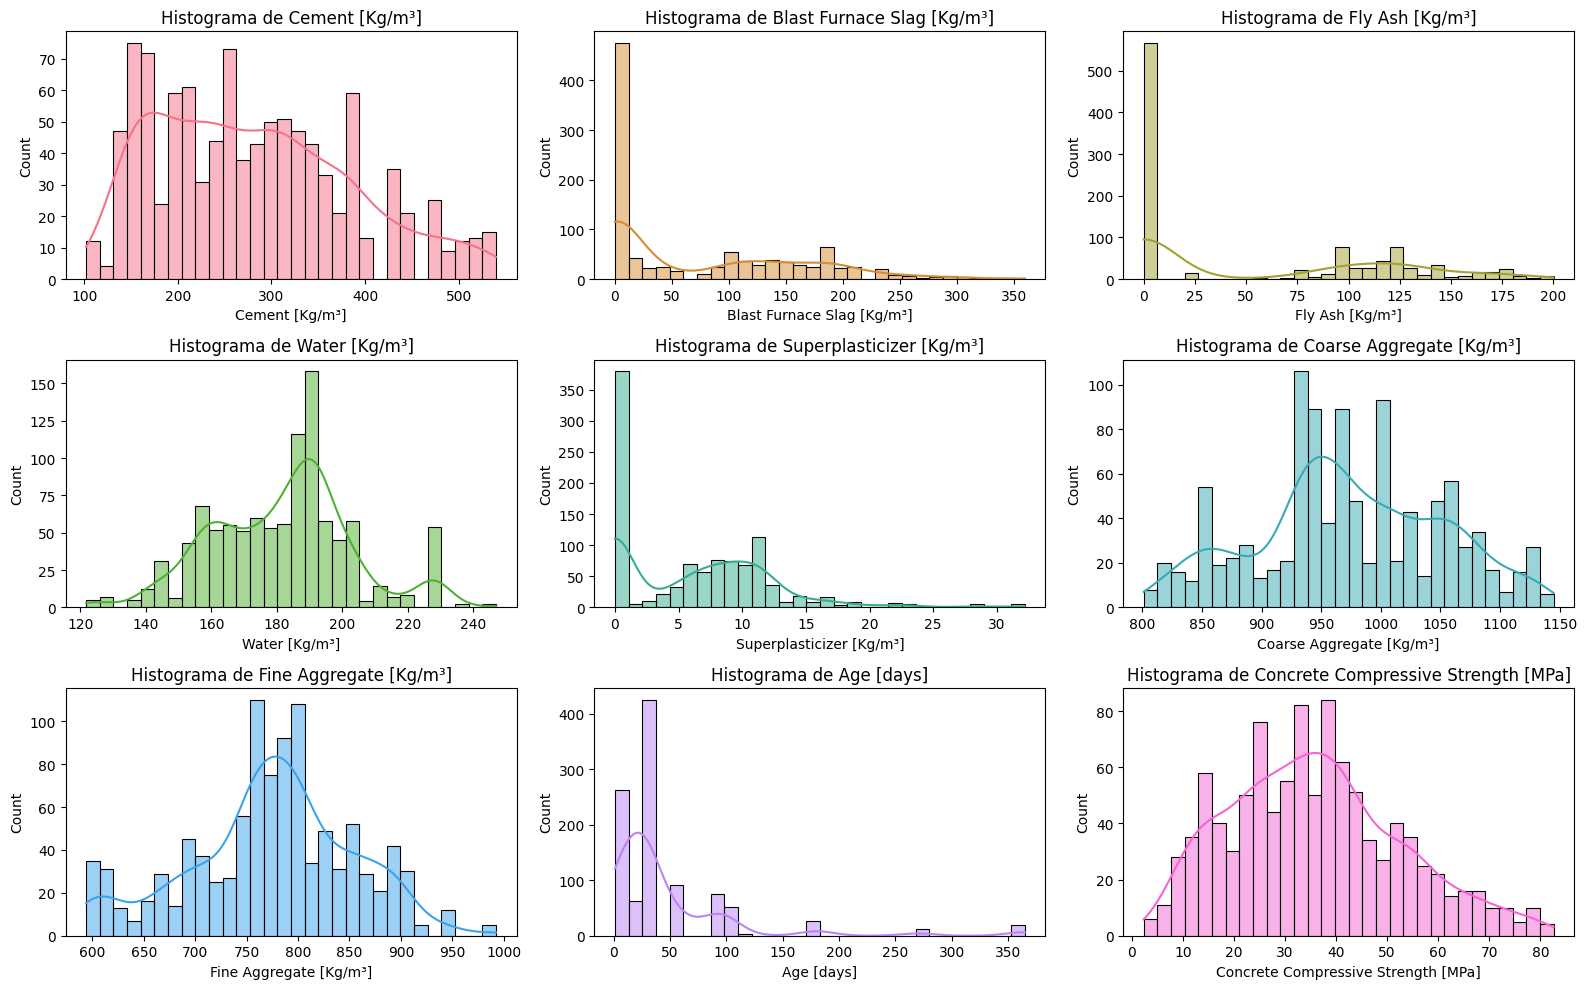

In [ ]:
colors = sns.color_palette("husl", n_colors=9)
variables = [
    "Cement [Kg/m³]", "Blast Furnace Slag [Kg/m³]", "Fly Ash [Kg/m³]",
    "Water [Kg/m³]", "Superplasticizer [Kg/m³]", "Coarse Aggregate [Kg/m³]",
    "Fine Aggregate [Kg/m³]", "Age [days]", "Concrete Compressive Strength [MPa]"
]

plt.figure(figsize=(16, 10))
for i, var in enumerate(variables):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[var], kde=True, bins=30, color=colors[i])
    plt.title(f"Histograma de {var}")

plt.tight_layout()
plt.show()

En estos gráficos de histogramas para cada variable podemos apreciar la distribución que poseen cada uno.
Se puede ver que Cement, Water, Coarse Aggregate, Fine Aggregate y Concrete Compressive Strength tienen una marcada distribución normal.
Mientras que Blast Furnace Slag, Fly Ash, Superplasticizer y Age.

-----------------------------------------
### <u>Análisis Bivariado</u>:
Aquí buscamos relaciones entre las variables de entrada y la resistencia del concreto.

### Correlaciones:

*   **Scatterplot:**

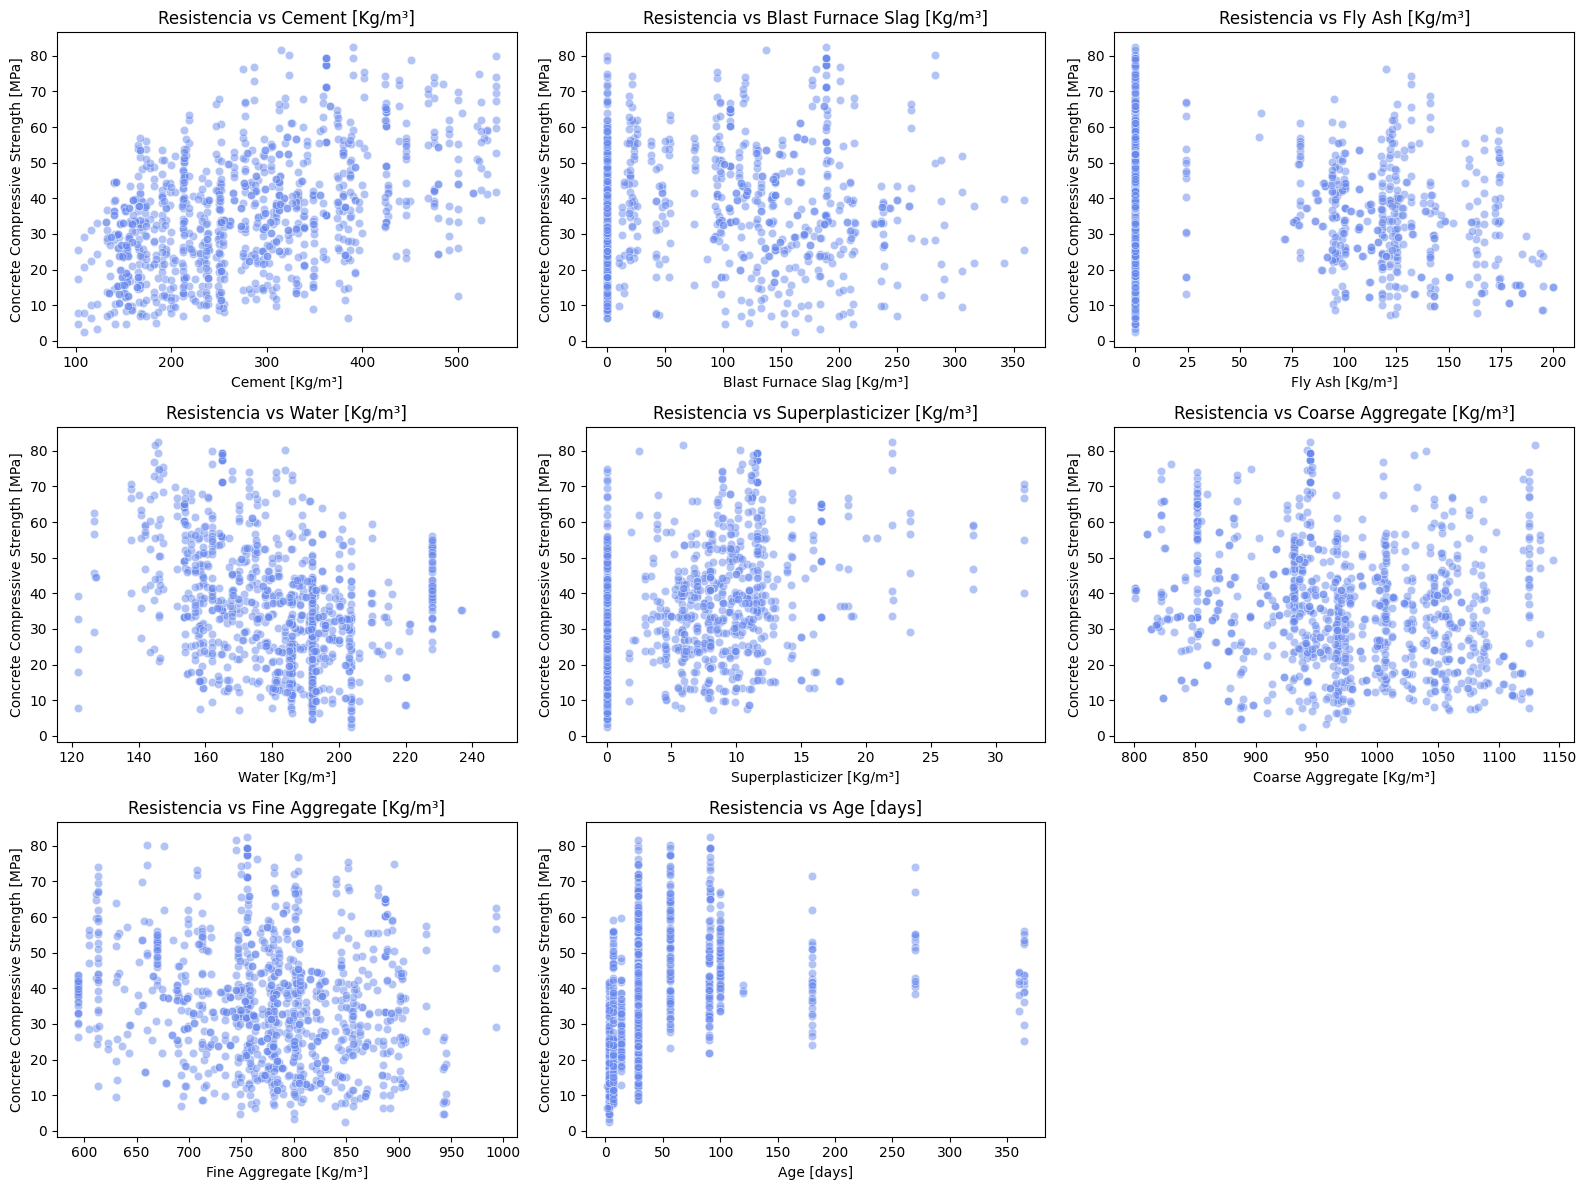

In [ ]:
plt.figure(figsize=(16, 12))
for i, var in enumerate(variables[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=df[var], y=df["Concrete Compressive Strength [MPa]"], alpha=0.5)
    plt.title(f"Resistencia vs {var}")

plt.tight_layout()
plt.show()

-----------------------------------------
### <u>Análisis Multivariado</u>:
Aquí exploramos relaciones entre todas las variables simultáneamente.

*   **Heatmap:**

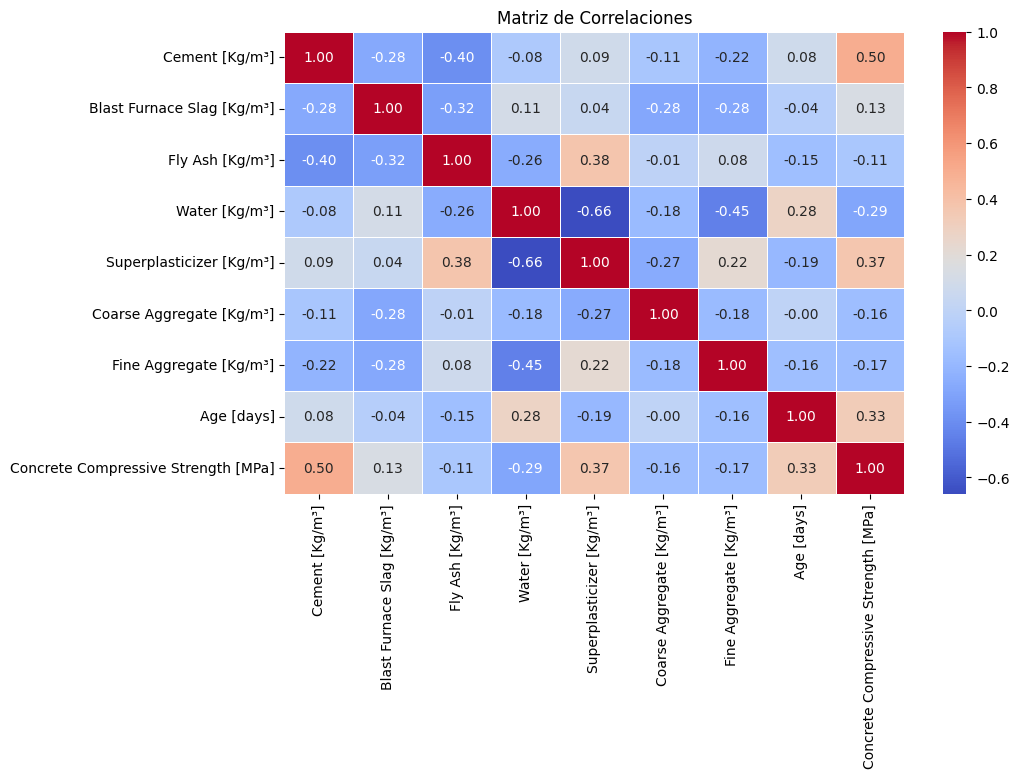

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlaciones")
plt.show()

**Interpretación del Coeficiente de Correlación**
- 0 a 0.2: Sin correlación o correlación muy débil.
- 0.2 a 0.3: Correlación débil.
- 0.3 a 0.5: Correlación moderada.
- 0.5 a 0.7: Correlación fuerte.
- 0.7 a 1.0: Correlación muy fuerte.

**Interpretación del signo de la correlación:**
- <u>Correlación negativa</u>: Un valor negativo indica que a medida que una variable aumenta, la otra tiende a disminuir.
- <u>Correlación positiva</u>: Un valor positivo indica que ambas variables tienden a aumentar o disminuir juntas.


**Aquellos que tienen una correlación con la resistencia del concreto son:**

| Variables     | Correlación     | Tipo de correlación     |
|---------------|---------------|---------------|
| Cemento| 0.5 | Correlación positiva moderada/fuerte |
| Agua | -0.29| Correlación negativa débil/moderada|
| Superplastificante | 0.37 |Correlación positiva moderada|
| Age | 0.33|Correlación positiva débil/moderada|

*   **Pairplot:**

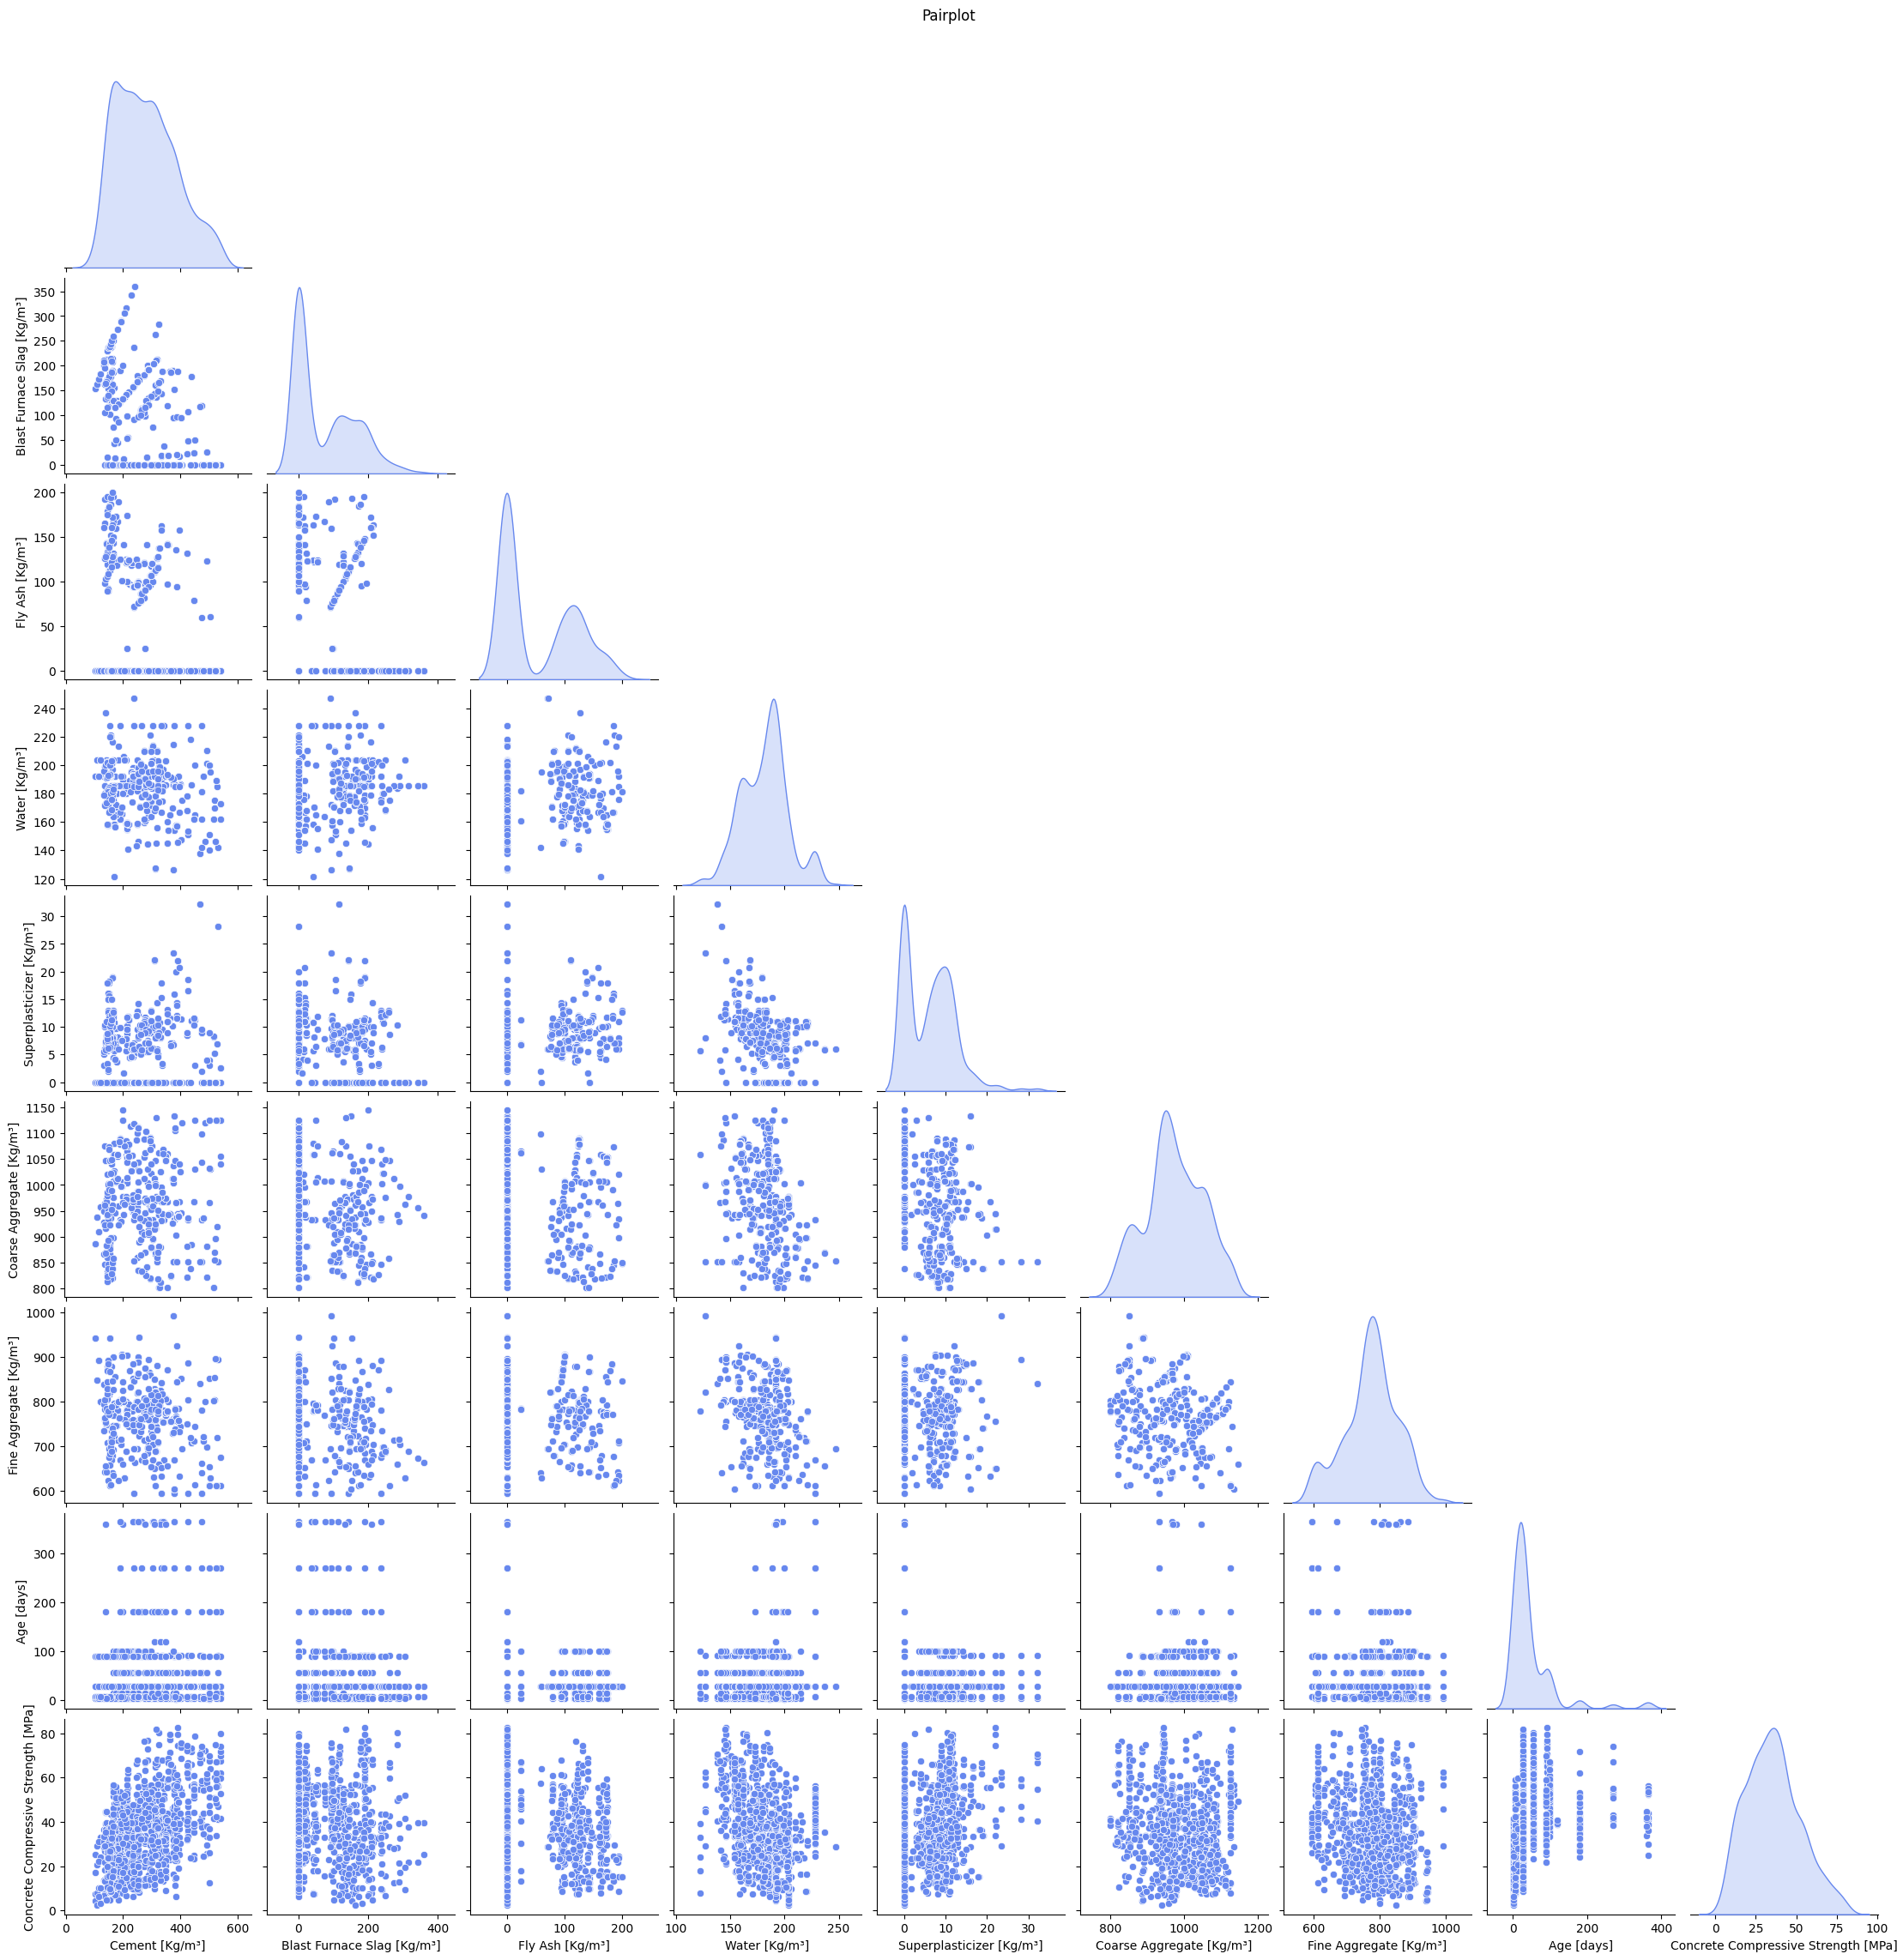

In [ ]:
sns.pairplot(df, diag_kind="kde", corner=True)
plt.suptitle("Pairplot", y=1.02)
plt.show()

---------------------
##<u>Conclusión Hipótesis según EDA realizado</u>:

1. "*Un mayor contenido de cemento estará asociado con una mayor resistencia del concreto.*"  
  ***A partir de las correlaciones obtenidas se puede ver que mayor contenido de cemento conlleva a una mayor resistencia del concreto.***

2. "*Una mayor cantidad de agua reducirá la resistencia a la compresión debido a una mayor porosidad.*"   
  ***No necesariamente. Por los resultados del análisis se puede ver que tiene una distribución normal respecto a la variación de la resistencia con la composición de agua. Esto quiere decir que la mayor resistencia lograda está acotada en un rango de contenido de agua.***

3. "La edad del concreto seguirá una relación no lineal con la resistencia, mostrando mayor crecimiento en los primeros días y estabilizándose después de 28 días."   
  ***Verdadero. Se puede ver en el grafico de Scatterplot de la Resistencia vs Age que al comienzo de los días hay una tendencia a aumentar la resistencia a medida que pasan los días, a partir de aproximadamente de los 28 días comienza a estabilizarse la resistencia en un valor constante***

4. "El uso de superplastificantes permitirá aumentar la resistencia al reducir la relación agua/cemento."   
  ***Verdadero. Mirando la matriz de correlación tenemos estos dos casos:***

  **- El agua es inversamente proporcional a la resistencia del concreto.**   
  **- El superplastificante es directamente proporcional a la resistencia del concreto.**

  ***Por lo que al reemplazar el agua por el superplastificante la resistencia del concreto aumenta debido a sacar agua (Que disminuye la resistencia) y aumenta el contenido de superplastificante (Que aumenta la resistencia).***